In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

# tf.enable_eager_execution()  # 在TensorFlow1.X版本中启用Eager Execution模式
tf.disable_eager_execution()  # 在TensorFlow2.X版本关闭Eager Execution
tf.__version__

'2.0.0'

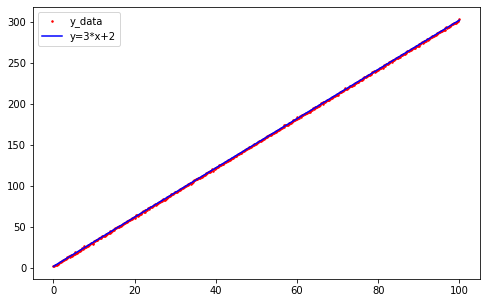

In [68]:
x_data = np.linspace(0, 100, 500)
y_data = 3 * x_data + 2 + np.random.randn(500) * 0.5

plt.figure(figsize=[8, 5])
plt.plot(x_data, y_data, 'r.', markersize=3)
plt.plot(x_data, 3 * x_data + 2, 'b-')
plt.legend(['y_data', 'y=3*x+2'])

In [5]:
x = tf.placeholder('float', name='x')
y = tf.placeholder('float', name='y')
w = tf.Variable(1.0, name='w0')
b = tf.Variable(1.0, name='b0')
def model(x, w, b):
    return x * w + b
pred = model(x, w, b)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [62]:
train_epochs = 10
learning_rate = 0.0001
display_step = 50
loss_function = tf.reduce_mean(tf.square(y - pred))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
sess = tf.Session()
init = tf.global_variables_initializer()
loss_list = []
step = 0
sess.run(init)
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})
        bt=b.eval(session=sess)
        wt=w.eval(session=sess)
        loss_list.append(loss)
        step += 1
        if step % display_step == 0:
            print(f'Train Epoch: {epoch+1:02d}, Step: {step:03d}, loss={loss:.9f}')
print(sess.run(w))
print(sess.run(b))

Train Epoch: 01, Step: 050, loss=233.185546875
Train Epoch: 01, Step: 100, loss=10.291950226
Train Epoch: 01, Step: 150, loss=0.018804839
Train Epoch: 01, Step: 200, loss=1.673366666
Train Epoch: 01, Step: 250, loss=0.098391958
Train Epoch: 01, Step: 300, loss=0.149291873
Train Epoch: 01, Step: 350, loss=0.071084529
Train Epoch: 01, Step: 400, loss=2.497852564
Train Epoch: 01, Step: 450, loss=1.126896858
Train Epoch: 01, Step: 500, loss=0.044032350
Train Epoch: 02, Step: 550, loss=0.483016610
Train Epoch: 02, Step: 600, loss=0.113130979
Train Epoch: 02, Step: 650, loss=0.017406875
Train Epoch: 02, Step: 700, loss=1.673642993
Train Epoch: 02, Step: 750, loss=0.098353676
Train Epoch: 02, Step: 800, loss=0.149315447
Train Epoch: 02, Step: 850, loss=0.071100801
Train Epoch: 02, Step: 900, loss=2.497756004
Train Epoch: 02, Step: 950, loss=1.126896858
Train Epoch: 02, Step: 1000, loss=0.044006739
Train Epoch: 03, Step: 1050, loss=0.478098005
Train Epoch: 03, Step: 1100, loss=0.113747694
Trai

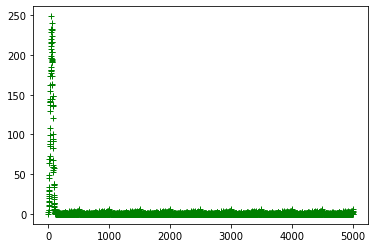

In [64]:
plt.plot(loss_list,'g+')

In [57]:
x_test = 5.79
y_hat = sess.run(model(x_test, w, b))
y_target = 3 * x_test + 2
print(f'当x=5.79时，目标值为{y_target}，模型预测值为{y_hat}')

当x=5.79时，目标值为19.37，模型预测值为19.059463500976562


In [32]:
logdir = './log'
tf.summary.FileWriter(logdir, tf.get_default_graph()).close()